In [2]:
## Authors: Jeffrey, Yuvik, Yiwei
## Advanced Python Programming Final Project Work Part 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ticker = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
Dow_Jones = ticker[1]
Dow_Jones

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.84%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.88%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.87%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.57%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,4.92%
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.54%
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.03%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.00%
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.04%
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,NaN,1.25%


In [4]:
###Pull volume of stock for individual ticker as an example
MMM = pd.read_html('https://finance.yahoo.com/quote/MMM/history?period1=86400&period2=1618790400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true')
z = MMM[0]
z

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 16, 2021",198.72,199.67,197.98,198.58,198.58,2769500
1,"Apr 15, 2021",197.28,197.81,195.91,197.48,197.48,1461600
2,"Apr 14, 2021",195.55,197.39,195.02,196.75,196.75,1575000
3,"Apr 13, 2021",196.01,197.33,195.37,196.47,196.47,2259700
4,"Apr 12, 2021",198.20,199.29,197.06,197.83,197.83,1682100
...,...,...,...,...,...,...,...
96,"Nov 27, 2020",177.82,179.63,175.57,176.89,175.44,1267100
97,"Nov 25, 2020",176.84,177.34,175.45,177.12,175.67,2052200
98,"Nov 24, 2020",175.00,177.22,174.90,177.08,175.63,3086000
99,"Nov 23, 2020",173.76,174.86,173.45,174.14,172.72,2064300


In [5]:
def get_ticker(row):
    symbol = row['Symbol']
    indivtick = pd.read_html('https://finance.yahoo.com/quote/' + symbol+'/history?p=' + symbol)
    data = indivtick[0]
    data = data.drop(data.index[[100]])
    data['Adj Close**'] = data['Adj Close**'].values[::-1]
    close = data['Adj Close**']
    
    return [close]
    


In [6]:
Dow_Jones['close'] = Dow_Jones.apply(get_ticker, axis = 1)
Dow_Jones

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting,close
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.84%,"[[172.07, 172.60, 171.67, 173.25, 173.98, 175...."
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.88%,"[[119.45, 116.60, 118.33, 118.23, 118.21, 116...."
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.87%,"[[226.48, 225.72, 227.77, 228.83, 226.75, 229...."
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.57%,"[[123.06, 122.23, 121.60, 127.69, 127.62, 128...."
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,4.92%,"[[232.06, 234.43, 230.33, 228.62, 229.50, 225...."
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.54%,"[[177.54, 176.31, 179.96, 177.75, 177.42, 179...."
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.03%,"[[92.05, 91.16, 88.19, 88.12, 87.45, 87.18, 85..."
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.00%,"[[43.65, 43.57, 44.04, 44.04, 44.14, 44.75, 44..."
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.04%,"[[52.61, 52.91, 52.83, 53.40, 52.62, 52.83, 53..."
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,NaN,1.25%,"[[53.83, 53.41, 52.48, 53.54, 53.24, 53.24, 55..."


In [7]:
def AdjClose(DJ, Stock):

    y = DJ[DJ['Symbol'] == Stock].close
    y=y.ravel()
    adjclose = y[0][0]
    adjclose = [x for x in adjclose if not any(c.isalpha() for c in x)]
    adjclose = [float(i) for i in adjclose]
    return adjclose


In [8]:
apple = AdjClose(Dow_Jones, 'AAPL')
apple

[123.06,
 122.23,
 121.6,
 127.69,
 127.62,
 128.51,
 126.47,
 128.04,
 131.68,
 130.76,
 131.77,
 136.49,
 134.67,
 133.52,
 132.49,
 129.22,
 130.81,
 126.41,
 130.72,
 131.85,
 128.79,
 128.61,
 130.69,
 128.72,
 126.95,
 127.64,
 131.83,
 136.67,
 138.86,
 142.71,
 142.95,
 141.85,
 136.89,
 131.76,
 133.94,
 134.79,
 133.74,
 137.18,
 136.76,
 136.91,
 136.01,
 135.39,
 135.13,
 135.37,
 133.19,
 130.84,
 129.71,
 129.87,
 126.0,
 125.86,
 125.35,
 120.99,
 121.26,
 127.79,
 125.12,
 122.06,
 120.13,
 121.42,
 116.36,
 121.09,
 119.98,
 121.96,
 121.03,
 123.99,
 125.57,
 124.76,
 120.53,
 119.99,
 123.39,
 122.54,
 120.09,
 120.59,
 121.21,
 121.39,
 119.9,
 122.15,
 123.0,
 125.9,
 126.21,
 127.9,
 130.36,
 133.0,
 131.24,
 134.43,
 132.03,
 134.5,
 134.16,
 134.84,
 133.11,
 133.5,
 131.94,
 134.32,
 134.72,
 134.39,
 133.58,
 133.48,
 131.46,
 132.54,
 127.85]

Text(0, 0.5, 'Adj. Price USD ($)')

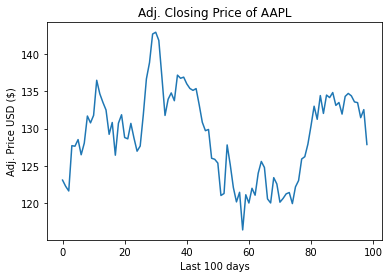

In [28]:
plt.plot(apple,  label='apple')
plt.title('Adj. Closing Price of AAPL')
plt.xlabel('Last 100 days')
plt.ylabel('Adj. Price USD ($)')

In [17]:
apple=pd.DataFrame(data=apple)
movingaverage_5 = pd.Series.rolling(apple, 5).mean()
movingaverage_5

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,124.440
...,...
94,133.790
95,134.098
96,133.526
97,133.090


In [18]:
movingaverage_30 = pd.Series.rolling(apple,30).mean()
movingaverage_30

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
94,127.989000
95,128.279667
96,128.644000
97,129.062333


In [25]:
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    ##if sma5 > sma30  then buy else sell
      if signal['rolling5'][i] > signal['rolling30'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['AAPL'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['rolling5'][i] < signal['rolling30'][i]:
        if flag != 0:
          sigPriceSell.append(signal['AAPL'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [20]:
signal = pd.DataFrame(index=apple.index)
signal['AAPL'] = apple
signal['rolling5'] = movingaverage_5
signal['rolling30'] = movingaverage_30
signal

,AAPL,rolling5,rolling30
0,123.06,NaN,NaN
1,122.23,NaN,NaN
2,121.60,NaN,NaN
3,127.69,NaN,NaN
4,127.62,124.440,NaN
...,...,...,...
94,133.58,133.790,127.989000
95,133.48,134.098,128.279667
96,131.46,133.526,128.644000
97,132.54,133.090,129.062333


In [23]:
s = buy_sell(signal)
signal['Buy_Signal_Price'] = s[0]
signal['Sell_Signal_Price'] = s[1]
signal
signal.Sell_Signal_Price.value_counts()

129.71    1
Name: Sell_Signal_Price, dtype: int64

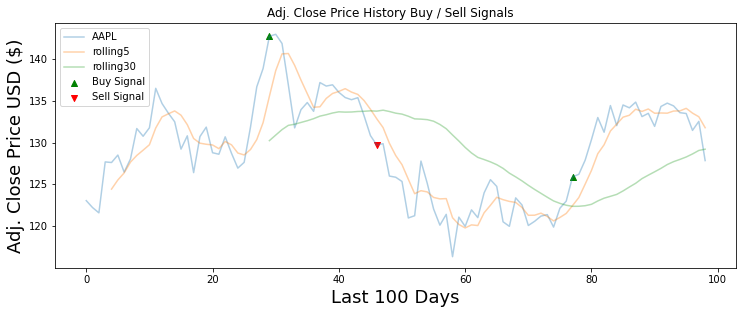

In [22]:
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'AAPL'

plt.figure(figsize=(12.2,4.5)) 
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)
plt.plot( my_stocks['rolling5'],  label='rolling5', alpha = 0.35)
plt.plot( my_stocks['rolling30'],  label='rolling30', alpha = 0.35)
plt.title(title)
plt.xlabel('Last 100 Days',fontsize=18)
plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [145]:
def buy_selladj(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
      if signal['rolling5'][i] > signal['rolling10'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['ticker'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['rolling5'][i] < signal['rolling10'][i]:
        if flag != 0:
          sigPriceSell.append(signal['ticker'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [146]:
def buy_sell_fn(stockname):
    stockname=pd.DataFrame(data=stockname)
    movingaverage_5 = pd.Series.rolling(stockname, 5).mean()
    movingaverage_10 = pd.Series.rolling(stockname,10).mean()
    signal = pd.DataFrame(index=stockname.index)
    signal['ticker'] = stockname
    signal['rolling5'] = movingaverage_5
    signal['rolling10'] = movingaverage_10
    s = buy_selladj(signal)
    signal['Buy_Signal_Price'] = s[0]
    signal['Sell_Signal_Price'] = s[1]
    print(signal.Buy_Signal_Price.value_counts())
    print(signal.Sell_Signal_Price.value_counts())
    return signal

def buy_sellplot(signal,stockname):
    title = 'Adj. Close Price History Buy / Sell Signals for ' + stockname

    my_stocks = signal

    plt.figure(figsize=(12.2,4.5)) 
    plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.plot( my_stocks['ticker'],  label=stockname, alpha = 0.35)
    plt.plot( my_stocks['rolling5'],  label='rolling5', alpha = 0.35)
    plt.plot( my_stocks['rolling10'],  label='rolling10', alpha = 0.35)
    plt.title(title)
    plt.xlabel('Last 100 Days',fontsize=18)
    plt.ylabel('Adj. Close Price USD ($)',fontsize=18)
    plt.legend( loc='upper left')
    plt.show()

136.01    1
133.48    1
134.39    1
123.99    1
130.76    1
136.67    1
123.00    1
Name: Buy_Signal_Price, dtype: int64
134.72    1
131.46    1
134.79    1
133.58    1
133.19    1
126.41    1
122.54    1
Name: Sell_Signal_Price, dtype: int64


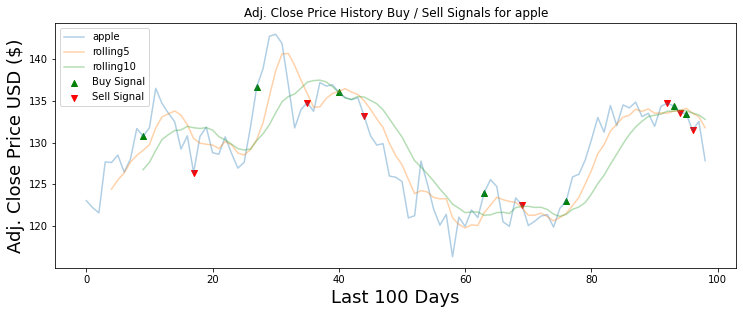

In [147]:
s = buy_sell_fn(apple)
s
buy_sellplot(s,'apple')

254.72    1
203.36    1
210.64    1
234.31    1
Name: Buy_Signal_Price, dtype: int64
218.78    1
202.06    1
235.19    1
249.52    1
241.25    1
Name: Sell_Signal_Price, dtype: int64


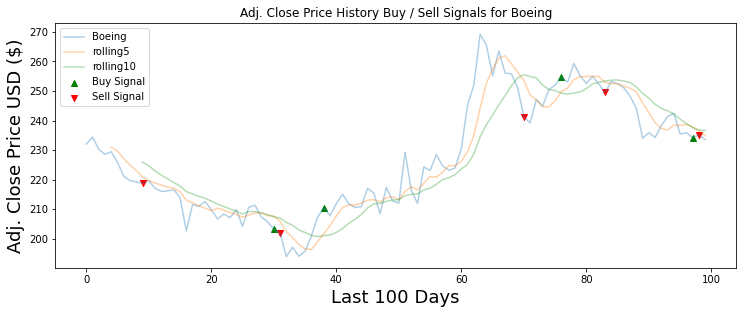

In [148]:
Boeing = AdjClose(Dow_Jones, 'BA')
s = buy_sell_fn(Boeing)
s
buy_sellplot(s,'Boeing')

155.19    1
150.03    1
137.44    1
122.91    1
151.34    1
Name: Buy_Signal_Price, dtype: int64
153.30    1
134.04    1
149.68    1
150.09    1
Name: Sell_Signal_Price, dtype: int64


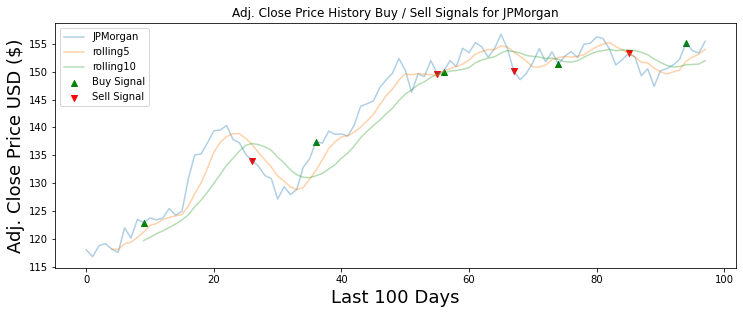

In [149]:
JPMorgan = AdjClose(Dow_Jones, 'JPM')
s = buy_sell_fn(JPMorgan)
s
buy_sellplot(s,'JPMorgan')

237.13    1
236.48    1
235.77    1
223.82    1
220.51    1
Name: Buy_Signal_Price, dtype: int64
217.40    1
231.85    1
254.56    1
235.99    1
234.51    1
Name: Sell_Signal_Price, dtype: int64


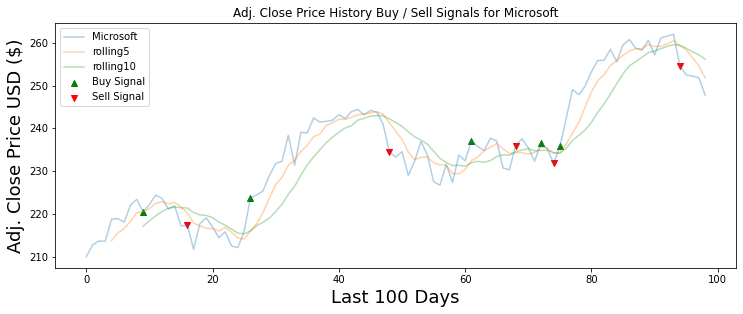

In [150]:
Microsoft = AdjClose(Dow_Jones, 'MSFT')
s = buy_sell_fn(Microsoft)
s
buy_sellplot(s,'Microsoft')

211.73    1
212.11    1
204.98    1
218.02    1
208.93    1
Name: Buy_Signal_Price, dtype: int64
208.38    1
206.90    1
212.56    1
208.32    1
Name: Sell_Signal_Price, dtype: int64


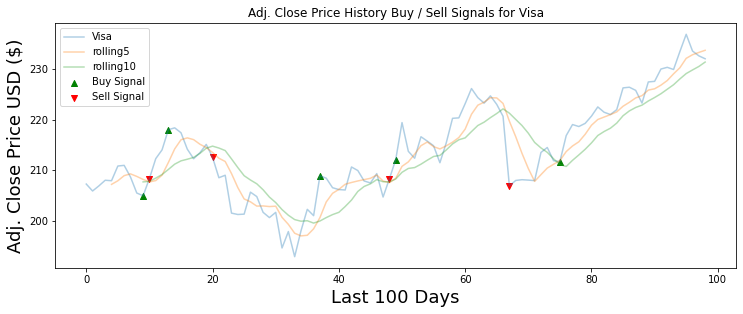

In [151]:
Visa = AdjClose(Dow_Jones, 'V')
s = buy_sell_fn(Visa)
s
buy_sellplot(s,'Visa')

In [ ]:
#Conclusion
#For large differences in the 5-day market week and monthly rolling average, this strategy works extremely well. For small difference in the two measures,
#it is hard to say. Regardless, the profit/loss evens out after a while (almost net 0)
#Very first ticker (introduced when 30 day rolling average kicks in) should be examined vary carefully, as it is sometimes incorrect